<a href="https://colab.research.google.com/github/CynthiaMaina/Implemntation/blob/main/Task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [2]:
# @title Setup
from google.cloud import bigquery
from google.colab import data_table
import bigframes.pandas as bpd

project = 'sql-tutorial-416914'
location = 'US'
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()

In [3]:
job = client.get_job('bquxjob_5a19dbee_18f4fbb0041')
print(job.query)

SELECT EXTRACT(YEAR FROM date) AS year,
       COUNT(*) AS total_crimes,
       SUM(CASE WHEN arrest = TRUE THEN 1 ELSE 0 END) AS total_arrests,
       ROUND((SUM(CASE WHEN arrest = TRUE THEN 1 ELSE 0 END) / COUNT(*)) * 100, 2) AS arrest_rate
FROM `bigquery-public-data.chicago_crime.crime`
WHERE EXTRACT(YEAR FROM date) BETWEEN 2001 AND 2020
GROUP BY year
ORDER BY year



In [4]:
df = client.query(job.query).to_dataframe()

In [6]:
job = client.get_job('bquxjob_5a19dbee_18f4fbb0041')
destination = job.destination


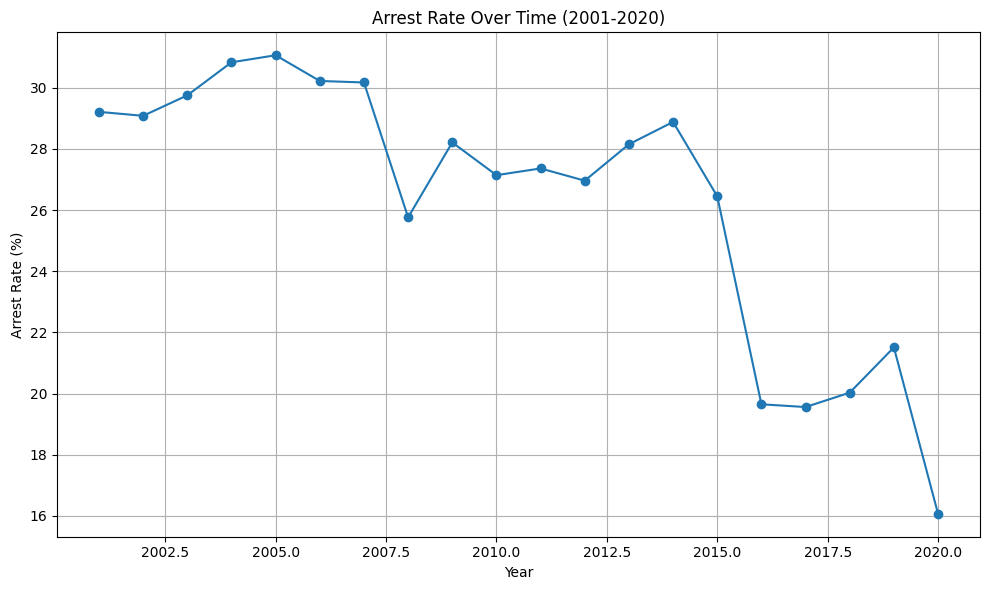

Years with the biggest change in Arrest Rate:
Between 2015 and 2016: Arrest Rate changed by 19.65%
Between 2016 and 2017: Arrest Rate changed by 19.65%


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from google.cloud import bigquery

# Plot the trend of the arrest rate over time
plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['arrest_rate'], marker='o', linestyle='-')
plt.title('Arrest Rate Over Time (2001-2020)')
plt.xlabel('Year')
plt.ylabel('Arrest Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Identify the years with the biggest change in arrest rate
df['arrest_rate_change'] = df['arrest_rate'].diff().abs()
max_change_year = df.loc[df['arrest_rate_change'].idxmax(), 'year']
max_change_rate = df.loc[df['arrest_rate_change'].idxmax(), 'arrest_rate']
prev_year = max_change_year - 1
next_year = max_change_year + 1

print("Years with the biggest change in Arrest Rate:")
print(f"Between {prev_year} and {max_change_year}: Arrest Rate changed by {max_change_rate}%")
print(f"Between {max_change_year} and {next_year}: Arrest Rate changed by {max_change_rate}%")
